<a href="https://colab.research.google.com/github/agrawalsourabh/DeepLearning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Data

**Learning Objective:**

* Learn how to load data from web.
* Built a neural network using keras
* Train a neural network using keras

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras

from keras.datasets import fashion_mnist

Using TensorFlow backend.


**Load the data**

In [8]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training Data - features ", x_train.shape)
print("Training Data - target ", y_train.shape)

print("Testing Data - features ", x_test.shape)
print("Testing Data - target ", y_test.shape)


4423680/4422102 [==============================] - 0s 0us/step
Training Data - features  (60000, 28, 28)
Training Data - target  (60000,)
Testing Data - features  (10000, 28, 28)
Testing Data - target  (10000,)


**Normalising the data**

In [0]:
x_train = x_train/255
x_test = x_test/255

**Visualise our data**

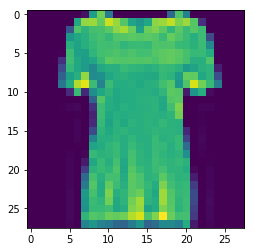

In [18]:
plt.imshow(x_train[10])

In [19]:
print(y_train[10])

0


**Define a neural network** </br>
With three layers

* Flatten (Input layer)
* Hidden layer
* Output layer 

In [0]:
model = keras.Sequential()

# Input Layer
model.add(keras.layers.Flatten())

# Hidden Layer
model.add(keras.layers.Dense(1024, activation=tf.nn.relu)) # units = 128 -> 128 neurons 

# Output layer
model.add(keras.layers.Dense(10, activation=tf.nn.softmax)) 

**Sequence:** Add Sequence of layers. </br>
**Flatten:** Flatten turns the input to 1D array. </br>
**Dense:** Add a layer of neurons.</br> </br>
Each layer of neurons needs an **activation function**, to tell them what to do.</br>

* **Relu:** It only passes value 0 or greater to the next layer. </br>
* **Softmax** Takes the set of values and effectively picks the biggest one.</br> </br>

**Built the model**</br>
Now the model is defined, actually to build it. We built it by compiling with the optimiser and a loss function.



In [20]:
print(tf.test.gpu_device_name())

/device:GPU:0


**Callback method**

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [36]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
             loss='sparse_categorical_crossentropy')

model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.2667

Reached 60% accuracy so cancelling training!


**Evaluate our model**

In [37]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 75us/step


0.32459772090911865

**Predictions**

In [31]:
y_pred = model.predict(x_test)

print(y_pred[1])

[7.05178027e-05 4.81786035e-11 9.96786714e-01 6.10330915e-08
 8.47396208e-04 1.08840285e-13 2.29533715e-03 6.83221993e-14
 1.46221690e-09 1.12093288e-12]


In [26]:
print(y_test[1])

2


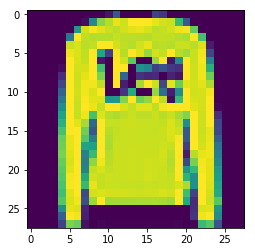

In [27]:
plt.imshow(x_test[1])